![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [4]:
df.shape

(541462, 3)

<Axes: >

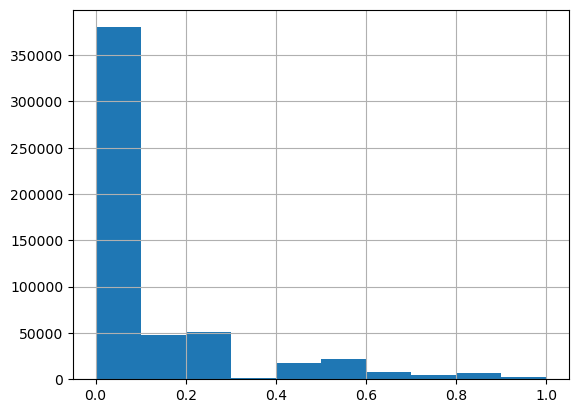

In [5]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [6]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [7]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [8]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
# Celda 1

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test) 

model = LinearRegression()
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.03716736934836343


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Tokenización de los comentarios usando CountVectorizer con trigramas
vectorizer = CountVectorizer(ngram_range=(1, 3))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)  

# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_vectorized, y_train)

# Predicción sobre el set de test
y_pred = model.predict(X_test_vectorized)

# Cálculo del MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.0539923076391344


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

#Celda 3
### CountVectorizer:
Es una técnica de vectorización que convierte una colección de documentos de texto en una matriz de conteo de términos. Cada fila de la matriz representa un documento y cada columna representa un término único en el conjunto de documentos. Los valores en la matriz son los recuentos de ocurrencias de cada término en cada documento.

* Funcionamiento: CountVectorizer primero tokeniza el texto en palabras individuales (unigramas) y luego cuenta la frecuencia de cada palabra en cada documento. También puede considerar n-gramas, donde n es el número de palabras consecutivas a considerar juntas (por ejemplo, bigramas, trigramas, etc.).
* Ventajas:Fácil de usar e implementar y es util para representar texto como vectores numéricos para su uso en algoritmos de aprendizaje automático.
* Desventajas: No captura la relación entre las palabras en un contexto más amplio y puede generar una representación dispersa de los datos, especialmente en conjuntos de datos grandes.

### Tokenización con trigramas:
Es una técnica que considera secuencias de tres palabras consecutivas como tokens. Esto significa que no solo se consideran palabras individuales, sino también combinaciones de tres palabras que aparecen en el texto.
 * Funcionamiento: La tokenización con trigramas se realiza dividiendo el texto en secuencias de tres palabras consecutivas. Cada una de estas secuencias se convierte en un token, que se utiliza para construir una representación vectorial del texto.
 * Ventajas: Captura mejor la relación entre las palabras en un contexto más amplio al considerar secuencias de tres palabras y puede proporcionar una representación más rica y detallada del texto.
 * Desventajas: Puede aumentar la dimensionalidad del espacio de características, lo que puede llevar a un mayor costo computacional y una mayor complejidad del modelo y requiere más recursos de memoria y puede ser más lento de procesar en conjuntos de datos grandes debido al aumento en el tamaño del vocabulario y 

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
# Celda 4
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Tokenización de los comentarios usando TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)  

# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_vectorized, y_train)

# Predicción sobre el set de test
y_pred = model.predict(X_test_vectorized)

# Cálculo del MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.02799816956817722


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

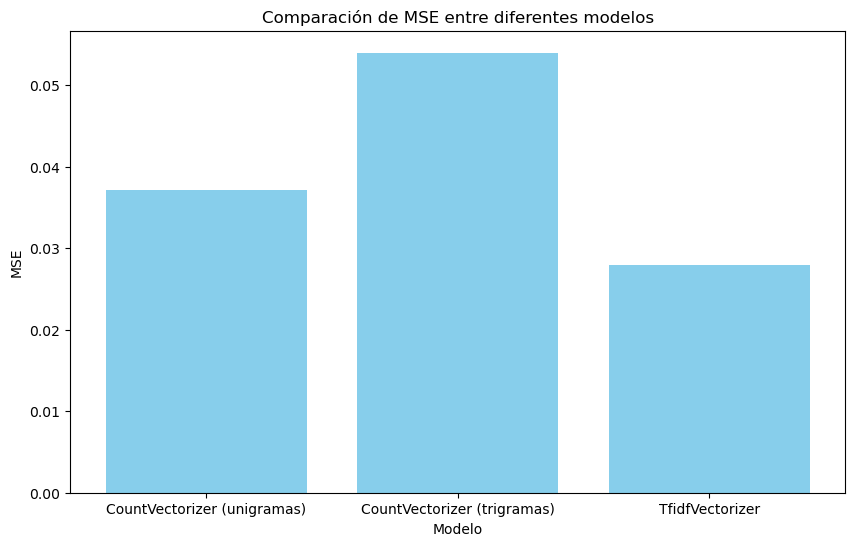

In [16]:
# Celda 5
import matplotlib.pyplot as plt

# Resultados de los MSE
model_names = ['CountVectorizer (unigramas)', 'CountVectorizer (trigramas)', 'TfidfVectorizer']
mse_values = [0.0372, 0.0540, 0.0280]

plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color='skyblue')
plt.xlabel('Modelo')
plt.ylabel('MSE')
plt.title('Comparación de MSE entre diferentes modelos')
plt.show()

Con CountVectorizer (unigramas): MSE = 0.0372
Con CountVectorizer (trigramas): MSE = 0.0540
Con TfidfVectorizer: MSE = 0.0280
Ahora, veamos cómo el preprocesamiento de texto afecta el desempeño de los modelos:

* CountVectorizer (unigramas): Este enfoque utiliza palabras individuales como características para el modelo. Aunque proporciona una representación simple y efectiva del texto, puede que no capture completamente la relación entre las palabras en el contexto del comentario. Sin embargo, en este caso, obtuvimos un MSE bastante bajo, lo que indica que el modelo pudo hacer buenas predicciones con este enfoque.
* CountVectorizer (trigramas): Al considerar trigramas en lugar de unigramas, se capturan secuencias de tres palabras consecutivas como características del modelo. Esto puede proporcionar una representación más rica del texto y capturar mejor la estructura y el significado de los comentarios. Sin embargo, en este caso, el MSE fue ligeramente mayor que con unigramas, esto signifca que el modelo podría haber tenido dificultades para generalizar con trigramas.
* TfidfVectorizer: Este enfoque utiliza el esquema tf-idf para ponderar las palabras en función de su frecuencia en el documento y su frecuencia en el corpus completo. Esto ayuda a resaltar las palabras más importantes y reducir el impacto de las palabras muy frecuentes que pueden no ser informativas. En este caso, el MSE fue el más bajo de los tres modelos, es decir que el modelo pudo beneficiarse de la ponderación tf-idf para mejorar su capacidad predictiva.